In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVC

In [30]:
df = pd.read_csv("pulsar_stars.csv")
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17694,94.617188,46.850847,0.524516,0.420866,3.088629,18.340531,8.245839,83.421775,0
17695,110.242188,44.725508,0.431287,0.734862,3.200669,20.669437,7.851218,69.931084,0
17696,140.914062,53.607373,-0.350052,-0.305454,0.956522,10.171183,16.789789,355.456367,0
17697,101.335938,41.941417,0.723182,1.436814,4.419732,22.971177,6.209395,43.208613,0


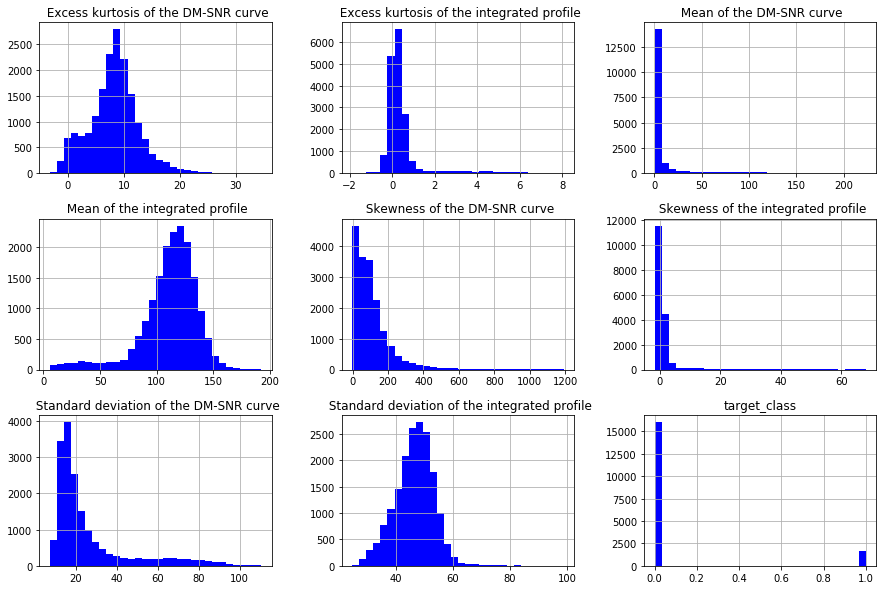

In [155]:
df.hist(color = 'b', bins = 30, figsize=(15,10))
plt.show()

In [31]:
X = np.array(df)
Y = np.array(df)

In [32]:
X_train, X_pred, Y_train, Y_pred = train_test_split(X, Y, test_size=0.25, random_state=0)

In [33]:
X_train = X_train[:,:-1]
X_pred = X_pred[:,:-1]
Y_train = Y_train[:,-1:]
Y_pred = Y_pred[:,-1:]

In [34]:
scaler = StandardScaler().fit(X_train)
standard_X_train = scaler.transform(X_train)
standard_X_pred = scaler.transform(X_pred)

In [35]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
prediction_LR = LR.predict(X_pred)
prediction_LR

array([[-0.13912218],
       [-0.10533966],
       [-0.00505203],
       ...,
       [ 0.03464657],
       [-0.01812118],
       [-0.02928434]])

In [37]:
mean_absolute_error(Y_pred, prediction_LR)

0.09383481623543782

In [38]:
mean_squared_error(Y_pred, prediction_LR)

0.025700343505280557

In [39]:
r2_score(Y_pred, prediction_LR)

0.6612608905608907

In [96]:
MLPR = MLPRegressor(max_iter = 500, hidden_layer_sizes=(100, 100,  ), activation='tanh', solver='lbfgs')
MLPR.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [101]:
prediction_MLPR = MLPR.predict(X_pred)
prediction_MLPR

array([ 0.00279399, -0.00082048,  0.02455408, ...,  0.00237336,
       -0.01474566, -0.00988697])

In [102]:
mean_absolute_error(Y_pred, prediction_MLPR)

0.04607749814800597

In [103]:
mean_squared_error(Y_pred, prediction_MLPR)

0.018602920239517623

In [104]:
r2_score(Y_pred, prediction_MLPR)

0.7548072992251552

In [107]:
MLPC = MLPClassifier(max_iter = 500, hidden_layer_sizes=(100,50,100, ))
MLPC.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [108]:
prediction_MLPC = MLPC.predict(X_pred)

In [109]:
mean_absolute_error(Y_pred, prediction_MLPC)

0.02463276836158192

In [110]:
acMLPC = accuracy_score(Y_pred, prediction_MLPC)
print(acMLPC * 100,"%","MLPC")

97.53672316384181 % MLPC


In [111]:
confusion_matrix(Y_pred, prediction_MLPC)

array([[4016,   43],
       [  66,  300]], dtype=int64)

In [113]:
target_names_p = ['Not Pulsar', 'Pulsar']
print(classification_report(Y_pred, prediction_MLPC, target_names = target_names_p))

              precision    recall  f1-score   support

  Not Pulsar       0.98      0.99      0.99      4059
      Pulsar       0.87      0.82      0.85       366

    accuracy                           0.98      4425
   macro avg       0.93      0.90      0.92      4425
weighted avg       0.97      0.98      0.98      4425



In [114]:
SGDC = linear_model.SGDClassifier(max_iter=1000, random_state=1)
SGDC.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
prediction_SGDC = SGDC.predict(X_pred)

In [116]:
mean_absolute_error(Y_pred, prediction_SGDC)

0.023954802259887005

In [117]:
acSGDC = accuracy_score(Y_pred, prediction_SGDC)
print(acSGDC * 100,"%","SGDC")

97.6045197740113 % SGDC


In [118]:
confusion_matrix(Y_pred, prediction_SGDC)

array([[4045,   14],
       [  92,  274]], dtype=int64)

In [119]:
target_names_p = ['Not Pulsar', 'Pulsar']
print(classification_report(Y_pred, prediction_SGDC, target_names = target_names_p))

              precision    recall  f1-score   support

  Not Pulsar       0.98      1.00      0.99      4059
      Pulsar       0.95      0.75      0.84       366

    accuracy                           0.98      4425
   macro avg       0.96      0.87      0.91      4425
weighted avg       0.98      0.98      0.97      4425



In [125]:
ETC = ExtraTreeClassifier(random_state=1)
ETC.fit(X_train, Y_train)
prediction_ETC = ETC.predict(X_pred)

In [126]:
mean_absolute_error(Y_pred, prediction_ETC)

0.03231638418079096

In [127]:
acETC = accuracy_score(Y_pred, prediction_ETC)
print(acETC * 100,"%","ETC")

96.7683615819209 % ETC


In [128]:
confusion_matrix(Y_pred, prediction_ETC)

array([[3978,   81],
       [  62,  304]], dtype=int64)

In [129]:
target_names_p = ['Not Pulsar', 'Pulsar']
print(classification_report(Y_pred, prediction_ETC, target_names = target_names_p))

              precision    recall  f1-score   support

      Pulsar       0.98      0.98      0.98      4059
  Not Pulsar       0.79      0.83      0.81       366

    accuracy                           0.97      4425
   macro avg       0.89      0.91      0.90      4425
weighted avg       0.97      0.97      0.97      4425



In [130]:
CLR = LogisticRegression(random_state=0, max_iter=500)
CLR.fit(X_train, Y_train)
prediction_CLR = CLR.predict(X_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
mean_absolute_error(Y_pred, prediction_CLR)

0.019887005649717515

In [132]:
acCLR = accuracy_score(Y_pred, prediction_CLR)
print(acETC * 100,"%","CLR")

96.7683615819209 % CLR


In [133]:
confusion_matrix(Y_pred, prediction_CLR)

array([[4038,   21],
       [  67,  299]], dtype=int64)

In [134]:
target_names_p = ['Not Pulsar', 'Pulsar']
print(classification_report(Y_pred, prediction_CLR, target_names = target_names_p))

              precision    recall  f1-score   support

  Not Pulsar       0.98      0.99      0.99      4059
      Pulsar       0.93      0.82      0.87       366

    accuracy                           0.98      4425
   macro avg       0.96      0.91      0.93      4425
weighted avg       0.98      0.98      0.98      4425



In [136]:
ABC = AdaBoostClassifier(n_estimators=75, random_state=0, learning_rate=1)
ABC.fit(X_train, Y_train)
prediction_ABC = ABC.predict(X_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
ABC.score(X_train, Y_train)

0.9799608256742505

In [138]:
mean_absolute_error(Y_pred, prediction_ABC)

0.021016949152542375

In [139]:
acABC = accuracy_score(Y_pred, prediction_ABC)
print(acETC * 100,"%","ABC")

96.7683615819209 % ABC


In [149]:
confusion_matrix(Y_pred, prediction_ABC)

array([[4038,   21],
       [  72,  294]], dtype=int64)

In [141]:
target_names_p = ['Not Pulsar', 'Pulsar']
print(classification_report(Y_pred, prediction_ABC, target_names = target_names_p))

              precision    recall  f1-score   support

  Not Pulsar       0.98      0.99      0.99      4059
      Pulsar       0.93      0.80      0.86       366

    accuracy                           0.98      4425
   macro avg       0.96      0.90      0.93      4425
weighted avg       0.98      0.98      0.98      4425



In [143]:
LSVC = LinearSVC(random_state=0, tol=1e-5)
LSVC.fit(X_train, Y_train)
prediction_LSVC = LSVC.predict(X_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [144]:
LSVC.score(X_train, Y_train)

0.9794334789814675

In [145]:
mean_absolute_error(Y_pred, prediction_LSVC)

0.01966101694915254

In [146]:
acLSVC = accuracy_score(Y_pred, prediction_LSVC)
print(acLSVC * 100,"%","LSVC")

98.03389830508475 % LSVC


In [148]:
confusion_matrix(Y_pred, prediction_LSVC)

array([[4034,   25],
       [  62,  304]], dtype=int64)

In [147]:
target_names_p = ['Not Pulsar', 'Pulsar']
print(classification_report(Y_pred, prediction_LSVC, target_names = target_names_p))

              precision    recall  f1-score   support

  Not Pulsar       0.98      0.99      0.99      4059
      Pulsar       0.92      0.83      0.87       366

    accuracy                           0.98      4425
   macro avg       0.95      0.91      0.93      4425
weighted avg       0.98      0.98      0.98      4425

